<a href="https://colab.research.google.com/github/MINGofHope/RL-Frozen-Leak/blob/master/Frozen_Lake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of contents
- Problem statement 
- Environment initialization
- Q Learning
  - Reinforcement Learning & Markov Decision Process (MDP)
  - Bellman Equation
  - Q Tables & Learning intuition and its **implementation**
  - Exploration and Exploiration

- Deep Q Learning (DQN)
  - Definition 
  - Significance 
  - Implementation

- Performance evalution
  - Render
  - Success rate vs. Eposides
  - Comparison between QL and QLN 

- References



# Environment

In [3]:
!pip install gym[toy_text]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 18.3 MB 105 kB/s 


In [11]:
import gym
import numpy as np


In [13]:
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False)
n_ob = env.observation_space.n
n_act = env.action_space.n
print(n_ob, n_act)
# env.render()

16 4


/usr/local/lib/python3.7/dist-packages/gym/core.py:318: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/usr/local/lib/python3.7/dist-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."


In [23]:
q = np.zeros((n_ob, n_act))
print(q)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [39]:
n_eps = 100
n_steps = 10

alpha = .5
lambda_ = .9
n_sucess = 0
result = []

for eps in range(n_eps):
  s = env.reset()
  result.append('Failure')

  for step in range(n_steps):

    a = env.action_space.sample()
    n_s, r, stop, info = env.step(a)
    q[s, a] = q[s, a] + alpha * (r + lambda_ * np.max(q[n_s]) - q[s, a])
    s = n_s

    if stop:
      n_sucess += 1
      result[-1] = 'Success'
      break

In [40]:
q

array([[0.50650526, 0.56226769, 0.56310192, 0.50666043],
       [0.50581315, 0.        , 0.62621127, 0.55792597],
       [0.56147209, 0.69715999, 0.49688966, 0.62387713],
       [0.59006162, 0.        , 0.40998184, 0.41506269],
       [0.5620364 , 0.62474306, 0.        , 0.50631339],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.77571442, 0.        , 0.59802917],
       [0.        , 0.        , 0.        , 0.        ],
       [0.61901481, 0.        , 0.69654835, 0.55882805],
       [0.60098619, 0.47935547, 0.77868922, 0.        ],
       [0.68631157, 0.86791992, 0.        , 0.66412683],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.29900391, 0.6046875 , 0.44696523],
       [0.39867188, 0.76289063, 0.96875   , 0.72318604],
       [0.        , 0.        , 0.        , 0.        ]])

In [41]:
print(n_sucess / n_eps)

0.75


['Success', 'Success', 'Success', 'Success', 'Success', 'Success', 'Success', 'Success', 'Success', 'Success', 'Success', 'Success', 'Success', 'Success', 'Success', 'Success', 'Success', 'Success', 'Failure', 'Success', 'Failure', 'Failure', 'Success', 'Success', 'Failure', 'Success', 'Failure', 'Success', 'Success', 'Success', 'Success', 'Failure', 'Success', 'Success', 'Failure', 'Failure', 'Success', 'Success', 'Success', 'Success', 'Failure', 'Success', 'Success', 'Success', 'Success', 'Success', 'Failure', 'Success', 'Success', 'Success', 'Success', 'Failure', 'Failure', 'Success', 'Failure', 'Success', 'Success', 'Failure', 'Success', 'Success', 'Success', 'Success', 'Failure', 'Success', 'Success', 'Failure', 'Failure', 'Success', 'Failure', 'Success', 'Success', 'Success', 'Success', 'Failure', 'Success', 'Failure', 'Success', 'Success', 'Success', 'Failure', 'Failure', 'Success', 'Success', 'Success', 'Success', 'Failure', 'Success', 'Failure', 'Success', 'Success', 'Success'

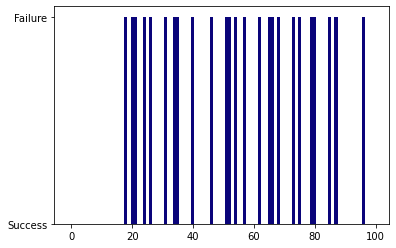

In [42]:
import matplotlib.pyplot as plt
plt.bar(range(n_eps), result, color="#0A047A", width=1.0)
print(result)

# References
- [Frozen Lake Official Documentation](https://www.gymlibrary.dev/environments/toy_text/frozen_lake/)
- [Q-learning for beginners
Train an AI to solve the Frozen Lake environment](https://mlabonne.github.io/blog/reinforcement%20learning/q-learning/frozen%20lake/gym/tutorial/2022/02/13/Q_learning.html)
- [DQN - Reinforcement Learning with Frozen Lake](https://martin-ueding.de/posts/reinforcement-learning-with-frozen-lake/)
- [Q-learning - taxi problem](https://github.com/MINGofHope/RL-Frozen-Leak/blob/master/ref_openai_gym_taxi_tutorial.ipynb)
- [DQN - taxi problem in lecture ](https://github.com/MINGofHope/RL-Frozen-Leak/blob/master/ref_DQN_Taxi_v3.ipynb)
- [Github tutorial if applicable](https://www.youtube.com/watch?v=RGOj5yH7evk)

# Project Management
Task Split & Time Arrangement 
- Report Draft
- Q Learing implemetation & Evaluation
- DQN implementation & Evaluation   🔔 (Oct 2, flexible)



# Problems that you have faced 